<img src='images/string1.jpg' width=500 height=400>

In [1]:
site = 'web-is-free'
print(site.split('-'))
site = [ "web", "is", "free" ]
print("-".join(site))

['web', 'is', 'free']
web-is-free


In [2]:
import re
word = "JAVA   가나다 $#javascript Aa 가나다 AAaAaA123 %^&* 파이썬"
print(re.sub("A", "", word))
print(re.sub("a", "", word)) 
print(re.sub("Aa", "", word)) 
print(re.sub("(Aa){2}", "", word))
print(re.sub("[Aa]", "", word)) 

JV   가나다 $#javascript a 가나다 aa123 %^&* 파이썬
JAVA   가나다 $#jvscript A 가나다 AAAA123 %^&* 파이썬
JAVA   가나다 $#javascript  가나다 AA123 %^&* 파이썬
JAVA   가나다 $#javascript Aa 가나다 AA123 %^&* 파이썬
JV   가나다 $#jvscript  가나다 123 %^&* 파이썬


In [3]:
print(re.sub("[가-힣]", "", word))
print(re.sub("[^가-힣]", "", word))

JAVA    $#javascript Aa  AAaAaA123 %^&* 
가나다가나다파이썬


In [ ]:
print(re.sub("[&^%*$#]", "", word))
# print(re.sub("[[:punct:]]", "", word))
print(re.sub("[^가-힣A-Za-z0-9\s]", "", word))

In [6]:
print(re.sub("[\w\s]", "", word))
print(re.sub("\s", "", word))
print(re.sub("\d", "", word))
print(re.sub("\D", "", word))

$#%^&*
JAVA가나다$#javascriptAa가나다AAaAaA123%^&*파이썬
JAVA   가나다 $#javascript Aa 가나다 AAaAaA %^&* 파이썬
123


In [5]:
print(re.sub("[^\w]", "", word))
print(re.sub("\W", "", word))

JAVA가나다javascriptAa가나다AAaAaA123파이썬
JAVA가나다javascriptAa가나다AAaAaA123파이썬


In [4]:
new_word = re.sub("[^가-힣\s]", "", word)
print("|"+new_word+"|")
new_word = re.sub("\s+", " ", new_word)
print("|"+new_word+"|")
print("|"+new_word.strip()+"|")

|   가나다   가나다   파이썬|
| 가나다 가나다 파이썬|
|가나다 가나다 파이썬|


# 파이썬으로 구현하는 텍스트 마이닝(자연어 처리)

-----

## 텍스트 마이닝이란 비/반정형 텍스트 데이터에서 자연어처리(Natural Language Processing)기술에 기반하여 유용한 정보를 추출, 가공하는 것을 목적으로 하는 기술이다.
### 텍스트 마이닝의 주요 기술

- 자연어 처리 (파싱, 형태소 분석, 품사 태깅, 관계 추출, 의미 추출)

- 언어모델링 (언어 감지, 규칙기반 개체명과 상용어 인식)

- 기계 학습 알고리즘 (반복훈련을 통해 습득한 정보 사용능력을 개선)

- 마이닝 기술 (각종 통계적 기법을 활용한 정보 분류 및 분석 기술)

## 텍스트 마이닝의 3단계 & 각 단계에서 필요한 준비
1. 문서 수집 (Crawling)

2. 형태소 분석 (NLP) (Konlpy)

3. 시각화 (Word Cloud)

## [ 형태소 분석 개요 ]

### 문서(document) > 문단(paragraph) > 문장(sentence) > 어절 > 형태소 > 음절

### * 형태소 : 의미를 가진 가장 작은 말의 단위. 더 나누면 뜻을 잃어버림.


## [ 형태소 분석 관련 패키지 설치 ]

### Jpype 패키지 설치 : Python에서 java 가상머신 사용 (Java 개발환경 필수 - 설치된 JDK 버전 확인) ]

### KoNLPy 패키지 설치 
***

## KoNLPy : 한국어 정보처리를 위한 파이썬 패키지 (https://konlpy.org/ko/latest/)

## 1. koNLPy를 활용한 형태소 분석

In [7]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
import pandas as pd
import numpy as np 

In [8]:
kkma = Kkma()

### 문단 -> 문장 (sentences)

In [9]:
pprint(kkma.sentences('네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


### 문단 -> 단어 (nouns) 

In [14]:
pprint(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.^^'))

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


### 문단 -> 형태소 추출 

In [11]:
pprint(kkma.pos('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.^^')) # 형태소 + 태그

[('질문', 'NNG'),
 ('이나', 'JC'),
 ('건의', 'NNG'),
 ('사항', 'NNG'),
 ('은', 'JX'),
 ('깃헙', 'UN'),
 ('이슈', 'NNG'),
 ('트래커', 'UN'),
 ('에', 'JKM'),
 ('남기', 'VV'),
 ('어', 'ECS'),
 ('주', 'VXV'),
 ('세요', 'EFN'),
 ('.', 'SF'),
 ('^^', 'EMO')]


In [12]:
pprint(kkma.morphs('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.^^')) # 형태소

['질문',
 '이나',
 '건의',
 '사항',
 '은',
 '깃헙',
 '이슈',
 '트래커',
 '에',
 '남기',
 '어',
 '주',
 '세요',
 '.',
 '^^']


### [형태소 분석기 비교]

In [15]:
sample = '이것은 형태소 분석기 입니다 아버지가방에들어가신다'

In [16]:
from konlpy.tag import Hannanum  
hannanum = Hannanum() 
pprint(hannanum.nouns(sample))
pprint(hannanum.morphs(sample))
pprint(hannanum.pos(sample))

['이것', '형태소', '분석기', '아버지가방에들어가']
['이것', '은', '형태소', '분석기', '일', 'ㅂ니다', '아버지가방에들어가', '이', '시ㄴ다']
[('이것', 'N'),
 ('은', 'J'),
 ('형태소', 'N'),
 ('분석기', 'N'),
 ('일', 'P'),
 ('ㅂ니다', 'E'),
 ('아버지가방에들어가', 'N'),
 ('이', 'J'),
 ('시ㄴ다', 'E')]


In [17]:
kkma = Kkma() 
pprint(kkma.nouns(sample))
pprint(kkma.morphs(sample))
pprint(kkma.pos(sample))

['이것', '형태소', '분석기', '아버지', '아버지가방', '가방']
['이것', '은', '형태소', '분석기', '이', 'ㅂ니다', '아버지', '가방', '에', '들어가', '시', 'ㄴ다']
[('이것', 'NP'),
 ('은', 'JX'),
 ('형태소', 'NNG'),
 ('분석기', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]


In [18]:
from konlpy.tag import Okt                                 
okt = Okt()
pprint(okt.nouns(sample))
pprint(okt.morphs(sample))
pprint(okt.pos(sample))

['것', '형태소', '분석', '기', '아버지', '가방']
['이', '것', '은', '형태소', '분석', '기', '입니다', '아버지', '가방', '에', '들어가신다']
[('이', 'Determiner'),
 ('것', 'Noun'),
 ('은', 'Josa'),
 ('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('기', 'Noun'),
 ('입니다', 'Adjective'),
 ('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]


In [19]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [20]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [21]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [23]:
tagsets = pd.DataFrame()                            ## 빈 데이터프레임을 만든다. 
N = 67
                                                   ##  한글 형태소 분석기에 있는 품사에 대한 정보를 데이터프레임에 넣는다. 
tagsets["Hannanum-기호"] = list(hannanum.tagset.keys()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Hannanum-품사"] = list(hannanum.tagset.values()) + list("*" * (N - len(hannanum.tagset)))
tagsets["Kkma-기호"] = list(kkma.tagset.keys()) + list("*" * (N - len(kkma.tagset)))
tagsets["Kkma-품사"] = list(kkma.tagset.values()) + list("*" * (N - len(kkma.tagset)))
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))

In [24]:
display(tagsets.head(N))

,Hannanum-기호,Hannanum-품사,Kkma-기호,Kkma-품사,OKT-기호,OKT-품사
0,E,어미,EC,연결 어미,Adjective,형용사
1,EC,연결 어미,ECD,의존적 연결 어미,Adverb,부사
2,EF,종결 어미,ECE,대등 연결 어미,Alpha,알파벳
3,EP,선어말어미,ECS,보조적 연결 어미,Conjunction,접속사
4,ET,전성 어미,EF,종결 어미,Determiner,관형사
...,...,...,...,...,...,...
62,*,*,XPV,용언 접두사,*,*
63,*,*,XR,어근,*,*
64,*,*,XSA,형용사 파생 접미사,*,*
65,*,*,XSN,명사파생 접미사,*,*


### 우리 교육의 메인 형태소 분석기는 Okt(Open Korean Text)임... 
#### (v0.5.0부터 Twitter()가 Okt()로 변경)

morphs(phrase, norm=False, stem=False)
Parse phrase to morphemes.

normalize(phrase)
nouns(phrase)
Noun extractor.

phrases(phrase)
Phrase extractor.

pos(phrase, norm=False, stem=False, join=False)
POS tagger. In contrast to other classes in this subpackage, this POS tagger doesn't have a flatten option, but has norm and stem options. Check the parameter list below.

매개 변수:	
norm -- If True, normalize tokens.
stem -- If True, stem tokens.
join -- If True, returns joined sets of morph and tag.


In [ ]:
 from konlpy.tag import Okt
 okt = Okt()
 print(okt.morphs('단독입찰보다 복수입찰의 경우'))
 print(okt.nouns('유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))
 print(okt.phrases('날카로운 분석과 신뢰감 있는 진행으로'))
 print(okt.pos('이것도 되나욬ㅋㅋ'))
 print(okt.pos('이것도 되나욬ㅋㅋ', norm=True)) # norm은 문장을 정규화
 print(okt.pos('이것도 되나욬ㅋㅋ', norm=True, stem=True)) # . stem은 각 단어에서 어간(어근, 원형)을 추출

## Okt 형태소 분석기 - 형태소 분석 외에도 정규화(normalization), 토큰화(tokenization), 어근화(stemming), 어구 추출(phrase extraction) 지원
***

## 2. 워드 클라우드

### WordCloud 설치 : conda install wordcloud
### 자주 나타나는 단어를 크게 보여주는 시각화
### https://amueller.github.io/word_cloud/index.html
### wordcloud 모듈 자체가 빈도를 계산하는 기능을 지원

In [ ]:
from matplotlib import font_manager, rc
font_path = "font/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [25]:
from wordcloud import WordCloud        ## 워드 클라우드 모듈을 사용한다 
import matplotlib.pyplot as plt 

In [26]:
myfontpath = "font/THEdog.ttf" 

In [27]:
wc = WordCloud(                        ## 워드클라우드 객체를 만들때 한글로 출력되도록 객체를 만든다 
    font_path = myfontpath,
    width = 200,
    height = 200
)

In [28]:
text = "둘리 도우너 또치 마이콜 희동이 둘리 둘리 도우너 또치 토토로 둘리 올라프 토토로 올라프 올라프 고길동 고길동"

In [29]:
wc = wc.generate(text)                ## 문자열만 전달해도 빈도수를 계산해서 처리
wc

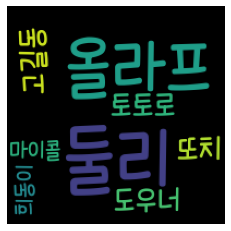

In [30]:
fig = plt.figure()
plt.imshow(wc)               ## 워드 클라우드 이미지로 출력한다 
plt.axis('off')
plt.show()

In [31]:
wc.to_file('output/ptest2.png')

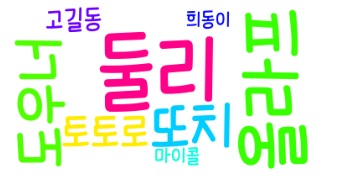

In [32]:
wc = WordCloud(
    font_path = myfontpath,
    background_color='white',                     ## 배경색을 지정한다 
    colormap = "hsv"
)
wc = wc.generate(text)
fig = plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

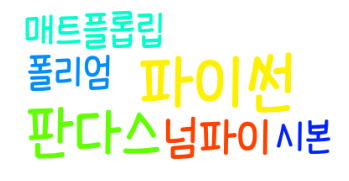

In [33]:
keywords = {'파이썬':7, '넘파이':3, '판다스':5, '매트플롭립':2, '시본':2, '폴리엄':2}             ## 특정 단어의 빈도를 딕셔너리로 만든다 

wc = wc.generate_from_frequencies(keywords)        ## 미리 빈도수를 계산하여 전달할 때는 generate_from_frequencies() 호출

fig = plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

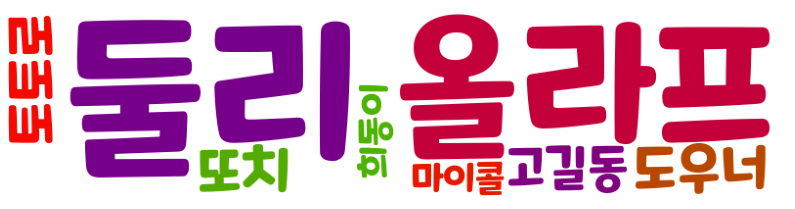

In [34]:
wc = WordCloud(
    font_path = "font/Maplestorybold.ttf",
    background_color='white',                     ## 배경색을 지정한다 
    colormap = "brg",
    width = 800, height = 200
)
wc = wc.generate(text)
fig = plt.figure(figsize=(14,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [36]:
from PIL import Image                                ## 이미지 파일을 처리하는 모듈을 사용한다. 
import numpy as np

In [37]:
r2d2_mask = np.array(Image.open('images/r2d2.JPG'))       ## 이미지를 읽어와서 다차원 배열로 변환한다 

In [38]:
r2d2_mask.shape

(425, 425, 3)

In [39]:
stopwords = set()                               ## 한글은 별도로 집합으로 불용어를 만든다 
stopwords.add("은")
stopwords.add("는")
stopwords.add("입니다")
stopwords.add("것인가")
stopwords.add("처럼")
stopwords.add("으세요")
stopwords.add("스타워즈")

wc = WordCloud(stopwords=stopwords,              ## 워드 클라우드 객체를 만든다 
                          font_path = myfontpath,
                          background_color='white',
                          width = 800,
                          height = 800,
                          mask=r2d2_mask)            ## 마스크 인자에 이미지를 전달한다 

In [40]:
texts = ['스타워즈 로봇 처럼 표시하는 것을 보기 위해 이것 은 예문 입니다 가을이라 겨울 바람 솔솔 불어오니 ',
         '여러분 의 문장을 넣으세요 ㅎㅎㅎ 스타워즈 영화에 나오는 다양한 로봇처럼 r2d2',
         '스타워즈는 재미있는 영화입니다']
content = " ".join(texts)

In [41]:
wc = wc.generate_from_text(content)    ## 두 개의 문자을 연결해서 워드클라우드를 만든다 
wc

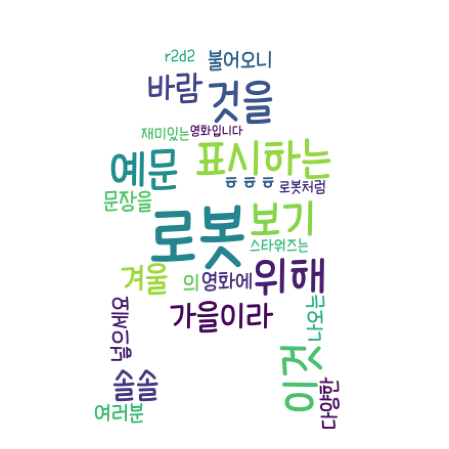

In [42]:
plt.figure(figsize=(8,8))
plt.imshow(wc)         ## 이미지를 출력하면 전달된 모양에 따라 표시한다 
plt.axis("off")
plt.show()

In [43]:
wc.to_file('output/ptest3.png')

## 3. 한국어 기반의 자연어 처리 모듈 : nltk

### NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지다. 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다.

### NLTK 패키지가 제공하는 주요 기능은 다음과 같다.

- 말뭉치
- 토큰 생성

### 말뭉치
#### 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다. 
### 토큰 생성
#### 자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 하며 이 문자열 단위를 토큰(token)이라고 함 
#### 워드 단위, 문자 단위, n-gram 단위로 토큰화가 가능하다.

In [ ]:
import nltk                     ## 자연어처리 모듈 

In [ ]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()

In [ ]:
files_ko

In [ ]:
doc_ko = kobill.open('1809898.txt').read()         ## 특정 텍스트 파일을 읽어온다 

In [ ]:
print(type(doc_ko))
display(doc_ko)

In [ ]:
from konlpy.tag import Okt      
t = Okt()
tokens_ko = t.nouns(doc_ko)                ## 텍스트에서 명사를 추출한다. 
print(tokens_ko[:10])

In [ ]:
nouns_text = nltk.Text(tokens_ko)       ## 명사로 추출한 것을 텍스트 객체로 만든다 
nouns_text

In [ ]:
type(nouns_text)

In [ ]:
len(nouns_text.tokens)                         ##  명사로 분리된 개수를 확인한다 

In [ ]:
len(set(nouns_text.tokens))                   ## 유일한 단어의 개수를 확인한다 

In [ ]:
nouns_text.tokens[:10]

### Text 클래스의 vocab() 메서드를 가지고 FreqDist 객체 리턴
### FreqDist 객체 : 문서에 사용된 단어(토큰)의 사용빈도 정보를 저장

In [ ]:
nouns_text.vocab()                    ## 동일한 단어의 발생 빈도를 확인한다. 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import font_manager, rc
font_path = "font/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [ ]:
plt.figure(figsize=(12,6))
nouns_text.plot(50)                         ## 단어별로 발생빈도에 맞도록 그래프를 그린다. 

In [ ]:
nouns_text.count('파견')                  ## 특정 단어의 발생빈도를 확인한다. 

In [ ]:
nouns_text.count('소말리아')

In [ ]:
nouns_text.concordance('소말리아')             ## 특정 단어가 있는 곳 리턴

In [ ]:
data = nouns_text.vocab().most_common(150)                 ## 가장 많이 발생한 단어를 선택한다. 

In [ ]:
print(data)

In [ ]:
from wordcloud import WordCloud   
wc = WordCloud(font_path=font_path,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [ ]:
wc = WordCloud(font_path=font_path,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      colormap = 'coolwarm',
                      mask=r2d2_mask
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

In [ ]:
wc = WordCloud(font_path=font_path,                                    ## .한글에 대한 위치를 표시한다. 
                      relative_scaling = 0.2,
                      background_color='white',
                      colormap = 'plasma',
                      mask=np.array(Image.open('images/clover.jpg'))
                      ).generate_from_frequencies(dict(data))             ## .단어별 빈도수를 딕셔너리로 변환해서 전달한다 
plt.figure(figsize=(10,6))
plt.imshow(wc)                                                      ## .이미지를 출력한다 
plt.axis("off")                                                            ## 그래프에 대한 축을 표시하지 않는다 
plt.show()

## 4. 텍스트 전처리

### **한국어 전처리 패키지 : PyKoSpacing & Py-Hanspell**
#### 전희원님이 개발한 PyKoSpacing은 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지이다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있다.

##### pip install git+https://github.com/haven-jeon/PyKoSpacing.git
##### pip install git+https://github.com/ssut/py-hanspell.git

In [ ]:
from hanspell import spell_checker

wrong_text = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(wrong_text)
print(wrong_text)
print(spelled_sent.checked)

## 5. 카운트 기반의 문서 표현

### 카운트 기반의 문서 표현은 문서의 의미를 반영해 벡터를 만드는 과정이다.
### 텍스트마이닝을 하려면 대상 텍스트를 다룰 수 있는 수치 형태로 변환해야 한다.

#### - 텍스트에서 word 기반의 다수 피처를 추출 --> 토큰화
#### - 피쳐마다 빈도수 부여 => 피처 벡터화 - BOW(Bag of Words), DTM, TDM, Word2Vec
#### - 텍스트를 벡터값을 가지는 피처로 변환하는 것이 머신러닝 모델 적용의 중요 요소

#### 방법(1) - nltk 패키지의 word_tokenize() 사용

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize 

corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
word_tokens1 = word_tokenize(corpus)
print(word_tokens1) 

In [ ]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens1: 
    if w not in stop_words: 
        result.append(w) 

print(result)

#### 방법(2) - Okt 객체의 morphs() 사용

In [ ]:
from konlpy.tag import Okt
t = Okt()  
corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."  
word_tokens2 = t.morphs(corpus)  
print(word_tokens2)

In [ ]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens2: 
    if w not in stop_words: 
        result.append(w) 

print(result)

#### 방법(3) - Okt 객체의 nouns() 사용

In [ ]:
from konlpy.tag import Okt
t = Okt()  
corpus = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."  
word_tokens3 = t.nouns(corpus)  
print(word_tokens3)

In [ ]:
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든 게 때"
stop_words = stop_words.split(' ')

result = [] 
for w in word_tokens3: 
    if w not in stop_words: 
        result.append(w) 

print(result)

---
### 한국어 불용어 참조 사이트 : https://www.ranks.nl/stopwords/korean
----

## Bag of Words(bow)
### 단어들의 순서는 고려하지 않고, 단어들의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법

### nltk의 vocab() 메서드 사용

In [ ]:
from konlpy.tag import Okt
t = Okt()  
corpus = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다 소비자가"  
word_tokens3 = t.morphs(corpus)  
print(word_tokens3)
nouns_text = nltk.Text(word_tokens3)
nouns_text.vocab()   

### 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다 소비자가"]
vector = CountVectorizer()
r = vector.fit_transform(corpus).toarray()
print(r) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(r.shape)
print(vector.vocabulary_)

In [ ]:
pd.Series(r[0], index=sorted(vector.vocabulary_)).idxmax()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다 소비자가"]
vector = CountVectorizer(stop_words=["정부가", "소비자가"])
r = vector.fit_transform(corpus).toarray()
print(r) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(r.shape)
print(vector.vocabulary_)

## DTM과 TDM
### - DTM(또는 TDM)은 BoW 의 확장으로서 TF 방법과 TF_IDF 방식으로 생성 가능
### - TF-IDF 는 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 주는 방법 

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해

In [ ]:
corpus = [
  '먹고 싶은 사과 바나나',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요 특히 바나나'
] 

In [ ]:
vector = CountVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) 
print(vector.vocabulary_) # 각 단어들의 인덱스가 어떻게 부여되었는지를 보여준다.

In [ ]:
tf = pd.DataFrame(dtm, columns = vector.get_feature_names_out())
display(tf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) 
print(vector.vocabulary_) # 각 단어들의 인덱스가 어떻게 부여되었는지를 보여준다.

In [ ]:
tfidf = pd.DataFrame(dtm, columns = vector.get_feature_names_out())
display(tfidf)

In [ ]:
corpus = [
           "커피 파스타 치킨 샐러드 아이스크림",
           "커피 우동 소고기김밥 귤",
           "참치김밥 커피 오뎅",
           "샐러드 피자 파스타 콜라",
           "티라무슈 햄버거 콜라",
           "파스타 샐러드 커피"    
]
vector = CountVectorizer()
dtm = vector.fit_transform(corpus).toarray()
print(dtm) 
tf = pd.DataFrame(dtm, columns = vector.get_feature_names_out())
display(tf)

In [ ]:
com = dtm.T @ dtm  # 동시 출현횟수
com

In [ ]:
comdf = pd.DataFrame(com, columns = vector.get_feature_names_out(), index = vector.get_feature_names_out())
display(comdf)

In [ ]:
import networkx as nx
G = nx.from_pandas_adjacency(comdf)

In [ ]:
G.degree

In [ ]:
edges = G.edges()
edges

In [ ]:
weights = nx.get_edge_attributes(G,'weight').values()
weights = [d ** 2 for d in weights ]
weights

In [ ]:
G.degree

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
from matplotlib import font_manager, rc
font_path = "font/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))
pos = nx.spring_layout(G,1)
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=17,
                 width=weights,
                 edge_color='grey',
                 #node_color='#00b4d9',
                 node_color=range(13),
                 with_labels = True,
                 node_size = np.diag(comdf)*3000,
                 font_family=font_name,
                 cmap=plt.cm.Set1,
                 ax=ax)
plt.show()

### 유사도 분석(cosine_similarity)

In [ ]:
d1 = "aaa bbb ccc"
d2 = "aaa bbb ddd"
d3 = "aaa bbb ccc"
d4 = "xxx yyy zzz"
dd = [d1, d2, d3, d4]

In [ ]:
vector = CountVectorizer()
dtm = vector.fit_transform(dd).toarray()
print(dtm) 
print(vector.vocabulary_)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(dtm, dtm)
print(similarity_simple_pair)


## 7. 한글 자모 분해와 결합

In [ ]:
import hgtk                      ## 한글의 자음과 모음을 분리하는 모듈을 사용한다 

### 한글 자모 분해, 조합(오토마타), 조사 붙이기, 초/중/종 분해조합, 한글/한자/영문 여부 체크 등을 지원

In [ ]:
hgtk.letter.decompose('감')          ## 특정 글자를 분리하면 초성 중성 종성으로 분리된다 

In [ ]:
hgtk.letter.compose('ㄱ', 'ㅏ', 'ㅁ')      ## 분리된 글자를 하나의 글자로 합친다. 

In [ ]:
sample_text = '''타밀어는 드라비다어족의 남부 계통, 즉 남부드라비다어파에 속하는 언어이다.
공식어로 지정된 인도의 주요 언어 중에서 타밀어와 계통적으로 가장 가까운 것은 말라얄람어인데, 
9세기 무렵까지 말라얄람어는 타밀어의 방언이었다.
이 두 언어 간에는 선사 시대에 일어난 서부 방언(말라얄람어의 원형) 분열의 증거가 되는 많은 차이가 있지만, 
13~14세기 무렵까지도 두 언어는 완전히 서로 다른 언어로 분리되지 않은 채였다.'''

In [ ]:
s = hgtk.text.decompose(sample_text)        ## 여러 문장에 대해 단어를 분리한다. 

In [ ]:
s[:40]

In [ ]:
hgtk.text.compose(s)[:40]                     ## 분리된 것을 하나로 합친다. 

In [ ]:
hgtk.checker.is_hangul('한글입니다')           ## 한글 여부를 확인한다 

In [ ]:
hgtk.checker.is_hangul('no한글입니다')         ## 일부 영어가 들어가면 한글로 인식하지 않는다 

In [ ]:
hgtk.checker.is_hangul('it is english')

In [ ]:
hgtk.checker.is_hanja('大韓民國')                  ## 한자도 확인할 수 있다. 

In [ ]:
hgtk.checker.is_hanja('大한민국')

In [ ]:
hgtk.checker.is_hanja('대한민국')

## Josa
EUN_NEUN - 은/는

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.EUN_NEUN)                 ## 단어에 맞는 조사를 붙여볼 수 있다. 

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.EUN_NEUN)

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.I_GA)

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.I_GA)

In [ ]:
hgtk.josa.attach('하늘', hgtk.josa.EUL_REUL)

In [ ]:
hgtk.josa.attach('바다', hgtk.josa.EUL_REUL)

## 한글 단어 분석을 위한 패키지 준비

In [ ]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [ ]:
import json
filename = 'etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'
inputFileName = 'data/'+filename
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

### 1-2. 분석할 데이터 추출

In [ ]:
message = ''

for item in data:
    if 'message' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
        
message #출력하여 내용 확인

### 1-3. 품사 태깅 : 명사 추출

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(message_N)

count   #출력하여 내용 확인

In [ ]:
word_count = {}

for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

### 바그래프로 시각화

In [ ]:
from matplotlib import font_manager, rc
font_path = "font/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [ ]:
plt.figure(figsize=(14,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

In [ ]:
word_count

### 워드클라우드

In [ ]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()